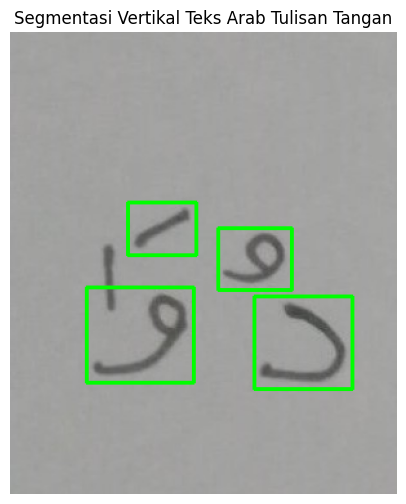

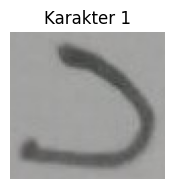

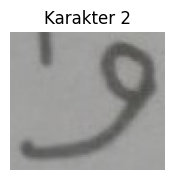

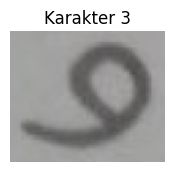

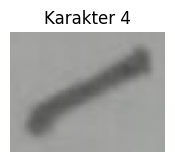

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
image = cv2.imread('../OCR/coba.jpg')

# Mengubah gambar menjadi grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Mengaplikasikan thresholding untuk mendapatkan gambar biner
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Menggunakan operasi morfologi untuk memperjelas teks
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(binary, kernel, iterations=2)

# Menemukan kontur yang merupakan bagian-bagian dari teks
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Membuat salinan gambar untuk visualisasi
segmented_image = image.copy()

# Daftar untuk menyimpan gambar potongan karakter
character_images = []

# Menggambar kontur pada gambar dan memotong karakter
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Mengabaikan kontur yang terlalu kecil (termasuk noise)
    if w > 20 and h > 20:
        # Menggambar kotak pada gambar untuk visualisasi
        cv2.rectangle(segmented_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Memotong karakter dari gambar asli
        character = image[y:y + h, x:x + w]
        
        # Menambahkan gambar potongan karakter ke daftar
        character_images.append(character)

# Mengonversi gambar BGR menjadi RGB untuk menggunakan matplotlib
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Menampilkan hasil segmentasi menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(segmented_image_rgb)
plt.title("Segmentasi Vertikal Teks Arab Tulisan Tangan")
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

# Menampilkan gambar potongan karakter yang terdeteksi
for idx, char_img in enumerate(character_images):
    plt.figure(figsize=(2, 2))
    plt.imshow(cv2.cvtColor(char_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Karakter {idx+1}")
    plt.axis('off')  # Menyembunyikan sumbu
    plt.show()
